EJERCICIO OBLIGATORIO PCA

Utilizar una librería para calcular las componentes principales e interpretar la PC1 (gráfica y teóricamente). El conjunto de datos europe.csv corresponde a características económicas, sociales y geográficas de 28 países de Europa. 

Las variables son:

- Country: Nombre del país.

- Area: área.

- GDP: producto bruto interno.

- Inflation: inflación anual.

- Life.expect: expectativa de vida media en años.

- Military: presupuesto militar.

- Pop.growth: tasa de crecimiento poblacional.

- Unemployment: tasa de desempleo.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Varianza explicada por cada componente:
- PC1: 0.4610
- PC2: 0.1696
- PC3: 0.1519
- PC4: 0.1101
- PC5: 0.0654
- PC6: 0.0241
- PC7: 0.0179


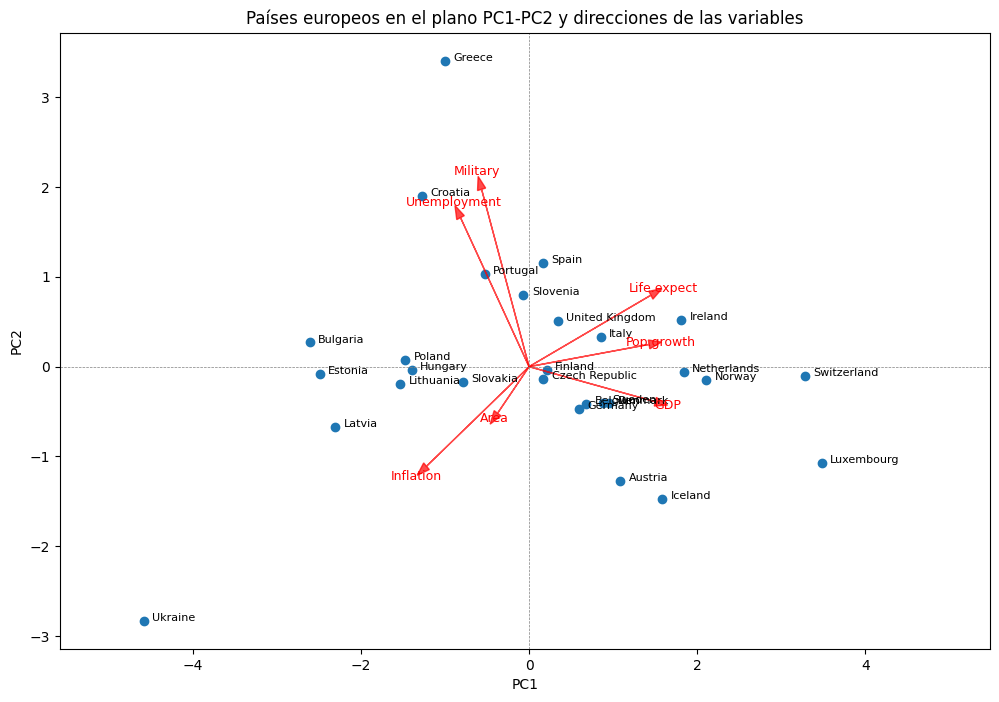

                   PC1       PC2       PC3       PC4       PC5       PC6  \
Area         -0.124874 -0.172872  0.898297  0.044850 -0.324017  0.190118   
GDP           0.500506 -0.130140  0.083956 -0.084255  0.390632  0.638657   
Inflation    -0.406518 -0.369657  0.198195  0.164686  0.689501 -0.323867   
Life.expect   0.482873  0.265248  0.246082  0.026771 -0.101787 -0.606434   
Military     -0.188112  0.658267  0.243679 -0.562375  0.368148  0.035596   
Pop.growth    0.475704  0.082622  0.163697  0.392463  0.347868 -0.120856   
Unemployment -0.271656  0.553204  0.000500  0.701968  0.010159  0.259705   

                   PC7  
Area          0.066643  
GDP          -0.397408  
Inflation    -0.226700  
Life.expect  -0.507031  
Military      0.137310  
Pop.growth    0.671147  
Unemployment -0.244662  


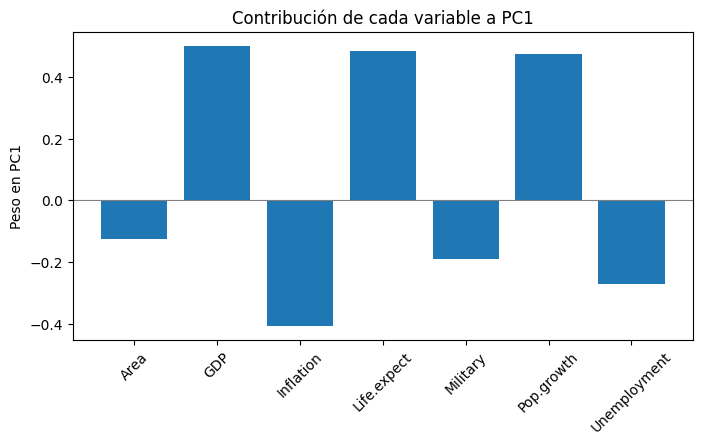

In [18]:
df = pd.read_csv("europe.csv")

# Estandarizar variables numéricas
X = df.drop(columns=["Country"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"- PC{i+1}: {var:.4f}")

# Gráfica de los países en el plano de las dos primeras componentes principales
plt.figure(figsize=(12,8))
# 1. Puntos de los países
plt.scatter(X_pca[:,0], X_pca[:,1])
for i, country in enumerate(df["Country"]):
    plt.text(X_pca[i,0]+0.1, X_pca[i,1], country, fontsize=8)
# 2. Vectores de las variables
loadings = pca.components_.T 
variables = X.columns
scaling_factor = 3  
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i,0]*scaling_factor, loadings[i,1]*scaling_factor, color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings[i,0]*scaling_factor*1.1, loadings[i,1]*scaling_factor*1.1, var, color='r', ha='center', va='center', fontsize=9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Países europeos en el plano PC1-PC2 y direcciones de las variables")
plt.xlim(X_pca[:,0].min()-1, X_pca[:,0].max()+2)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()


loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)
print(loadings)

plt.figure(figsize=(8,4))
plt.bar(loadings.index, loadings["PC1"])
plt.ylabel("Peso en PC1")
plt.title("Contribución de cada variable a PC1")
plt.axhline(0, color='gray', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()
